In [1]:
# project: p1
# submitter: aluo7
# partner: none
# hours: 15

In [2]:
# all imports
import copy
import pandas as pd
import os
from subprocess import check_output, CalledProcessError, STDOUT
from time import time
import numpy as np
import json

In [3]:
#Q1
type(7/2)

float

In [4]:
#Q2
x = 4
maximum = 10
minimum = 5
error = (x <= 5 or x >= 10) # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#Q3
word = "KAFKAESQUE"
suffix_match = (word.lower()[-5:] == "esque") # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
def add(x = 1, y = 1):
    return x+y

In [7]:
#Q4
add(3, 4)

7

In [8]:
#Q5
add(9)

10

In [9]:
#Q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [10]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [11]:
def smart_count(nums):
    sum = 0
    for x in nums:
        if x > 10:
            continue
        if x < 0:
            break
        else:
            sum += x
    return sum

In [12]:
#Q7
smart_count(nums)

14

In [13]:
#Q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [15]:
#Q9
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#Q10
rows[0][-1]["x"]

8

In [17]:
#Q11
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [18]:
#Q12
sum = 0
for x in range(len(rows)):
    sum += rows[x][header.index("B")]
sum

10007

In [19]:
#Q13
rows.sort(key=lambda row: row[header.index("B")])
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [20]:
#Q14
f = open("usd.json")
data = json.load(f)
f.close()

dollars = 400
dollars * data["eur"]["rate"]

413.73132225516

In [21]:
def divide(x, y):
    try:
        return x/y
    except ZeroDivisionError:
        return float("nan")

In [22]:
#Q15
divide(3, 2)

1.5

In [23]:
#Q16
divide(-3, 0)

nan

In [24]:
years = {}
for year in os.listdir("home-computers"):
    if year == ".ipynb_checkpoints":
        pass
    else:
        years[int(year[7:11])] = pd.DataFrame.set_index(pd.read_csv("../../f22/p1/home-computers/" + year, skiprows = 1), "Geographic Area Name")

In [25]:
#Q17
sorted(list(years.keys()))

[2013, 2014, 2015, 2016, 2017, 2018]

In [26]:
#Q18
df = years[2018].loc["Wisconsin", "Estimate!!Total"]
df

2371960

In [27]:
#Q19
df_sum = years[2018]["Estimate!!Total!!No Computer"].sum()
df_sum

10285814

In [28]:
#Q20
df_max = (years[2018]["Margin of Error!!Total!!No Computer"] / years[2018]["Estimate!!Total!!No Computer"]).max()
df_max

0.12375641594322287

In [29]:
#Q21
adj_states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
percentage = (pd.to_numeric(years[2018]["Estimate!!Total!!No Computer"]) / pd.to_numeric(years[2018]["Estimate!!Total"])) * 100
states_dict = dict(percentage[adj_states])
states_dict

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% of Households w/o Computers'>

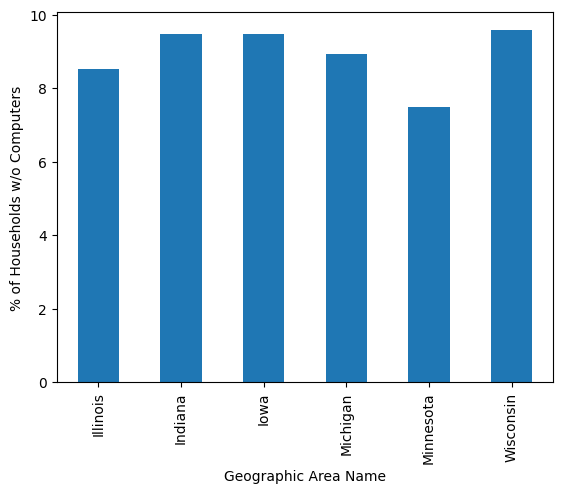

In [30]:
#Q22
series_percentage = pd.Series(states_dict)
series_percentage.plot.bar(ylabel = "% of Households w/o Computers", xlabel = "Geographic Area Name")

<AxesSubplot:xlabel='Year', ylabel='Wi Households w/o Computers (in thousands)'>

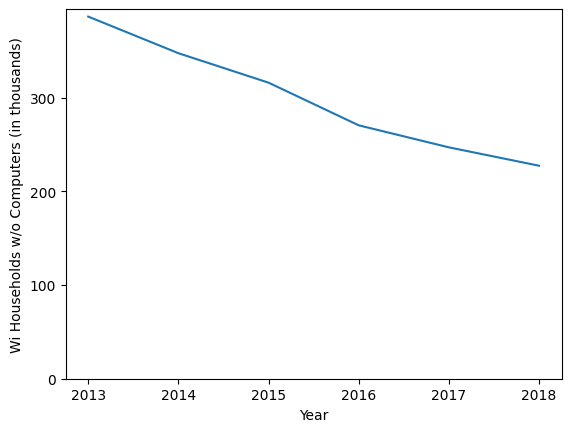

In [31]:
#Q23
yearly_totals = {}
year = [2013, 2014, 2015, 2016, 2017, 2018]
for x in year:
    yearly_totals[x] = years[x]["Estimate!!Total!!No Computer"]["Wisconsin"] / 1000
series_total = pd.Series(yearly_totals)
series_total.plot(ylabel = "Wi Households w/o Computers (in thousands)", xlabel = "Year", yticks = range(0, 400, 100))

<AxesSubplot:xlabel='Smartphones (millions)', ylabel='Tablets (millions)'>

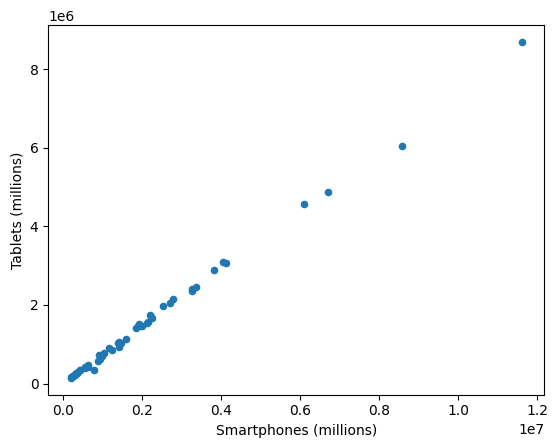

In [32]:
#Q24
smart = years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]
tab = years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]
graph = years[2018].plot.scatter(x = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone", 
                         y = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer")
graph.set_xlabel("Smartphones (millions)")
graph.set_ylabel("Tablets (millions)")
graph

In [33]:
#Q25
check_output(["git", "checkout", "main"], cwd = "flask")
output = str(check_output(["git", "log"], cwd = "flask"), "utf-8").split("\n")
output[0]

Already on 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [34]:
#Q26
commits = [x for x in output if x.startswith("commit")][-50:]
[w[7:] for w in commits]

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [35]:
#Q27
check_output(["git", "checkout", commits[-3][7:]], cwd = "flask")
f = open("/home/aluo7/f22/p1/flask/README")
f.read()

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [36]:
#Q28
f.close()
check_output(["git", "checkout", "main"], cwd = "flask")

users = [x for x in output if (("Merge pull request" in x) and ("/" in x))] 
users = [y.split(" ")[-1].split("/")[0] for y in users]

freq = {}
for user in users:
    if (user in freq):
        freq[user] += 1
    else:
        freq[user] = 1

freqGT = {}
for x in freq.keys():
    if freq[x] >= 5:
        freqGT[x] = freq[x]
        
freqGT

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'jeffwidman': 8,
 'garenchan': 8,
 'davidism': 45,
 'dawran6': 7,
 'untitaker': 20,
 'lord63-forks': 5,
 'methane': 5,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [37]:
#Q29
try:
    msg = check_output(["pip3", "instal"], stderr=STDOUT)
except CalledProcessError as e:
    msg = e.output
    
msg.decode("utf-8")

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [38]:
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

<AxesSubplot:>

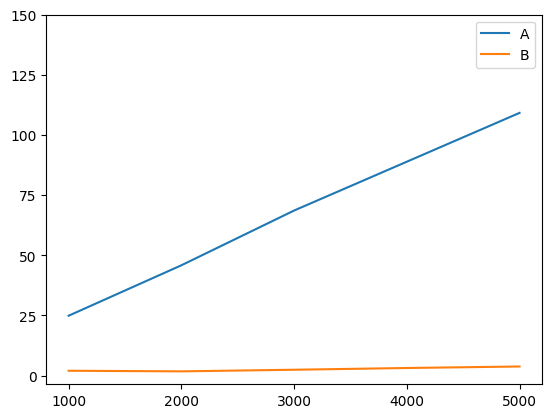

In [39]:
#Q30
times_df = pd.DataFrame(dtype=float)

for x in range(1000, 6000, 1000):
    df = rand_df(x)
    t0 = time()
    
    for row in df.iterrows():
        pass
    
    t1 = time()
    
    times_df.at[x, "A"] = (t1-t0) * 1e3
    
    t0 = time()
    
    for row in df.itertuples():
        pass
    
    t1 = time()
    
    times_df.at[x, "B"] = (t1-t0) * 1e3

times_df.plot.line(xticks = range(1000, 6000, 1000), yticks = range(0, 175, 25))

<AxesSubplot:>

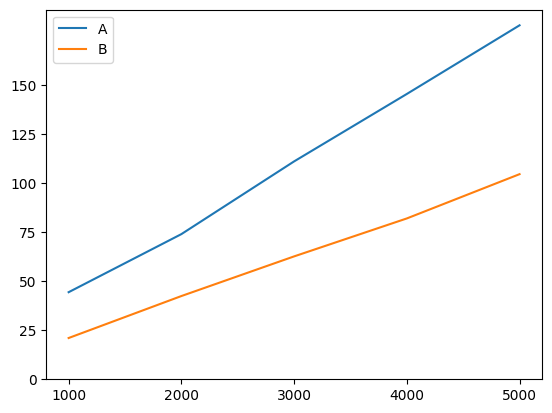

In [40]:
#Q31
times_df = pd.DataFrame(dtype=float)

for x in range(1000, 6000, 1000):
    df = rand_df(x)
    t0 = time()
    
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
            
    t1 = time()
    
    times_df.at[x, "A"] = (t1-t0) * 1e3
    
    t0 = time()
    
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
        
    t1 = time()   
    
    times_df.at[x, "B"] = (t1-t0) * 1e3

times_df.plot.line(xticks = range(1000, 6000, 1000), yticks = range(0, 175, 25))

In [41]:
def laugh(x):
    return "ha" * x

<AxesSubplot:>

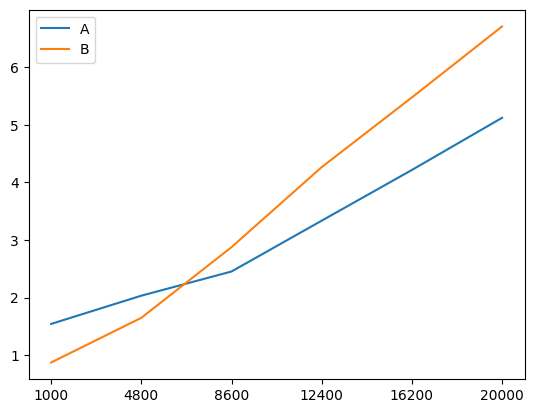

In [42]:
#Q32
times_df = pd.DataFrame(dtype=float)

for x in range(1000, 22000, 3800):
    df = rand_df(x)
    t0 = time()
    
    result = df["A"].apply(laugh).tolist()
    t1 = time()
    
    times_df.at[x, "A"] = (t1-t0) * 1e3
    
    t0 = time()
    
    result = []
    for val in df["A"]:
        result.append(laugh(val))
        
    t1 = time()
    
    times_df.at[x, "B"] = (t1-t0) * 1e3

times_df.plot.line(xticks = range(1000, 23000, 3800))